In [1]:
#Background: Task is to construct a circuit that fixes both the bit-flip and the sign-flip error in circuit #1 if any of the gates in 
#{I, X, Z} are applied just before the C-NOT gate.

#1) I could fix a bit-flip error in a two-qubit circuit by using an addition ancilla, set to |0>, to calculate the parity of both
# original qubits and use that to correct the error.

#2) I could fix a sign-flip error in a similar circuit as above by using using a similar correction approach but first changing
# my qubit states to the Hadamard basis and change back to the z-basis after correcting the error.

#3) If both errors are in a circuit, then one can use the Shor code --- which uses a nine-qubit circuit to fix an error in a qubit.
# Since the Shor code is for just a qubit, I have modified Shor's circuit to fix the error in circuit #1.


from qiskit import *
from numpy import pi
from qiskit.tools.visualization import plot_histogram

In [2]:
qr = QuantumRegister(18, 'q')
cr = ClassicalRegister(18, 'c')
circuit = QuantumCircuit(qr, cr)
# circuit1 = QuantumCircuit(qr, cr)
# circuit2 = QuantumCircuit(qr, cr)
# circuit3 = QuantumCircuit(qr, cr)
# circuit4 = QuantumCircuit(qr, cr)
# circuit5 = QuantumCircuit(qr, cr)
# circuit6 = QuantumCircuit(qr, cr)
# circuit7 = QuantumCircuit(qr, cr)
# circuit8 = QuantumCircuit(qr, cr)
simulator = Aer.get_backend('qasm_simulator') 
%matplotlib inline

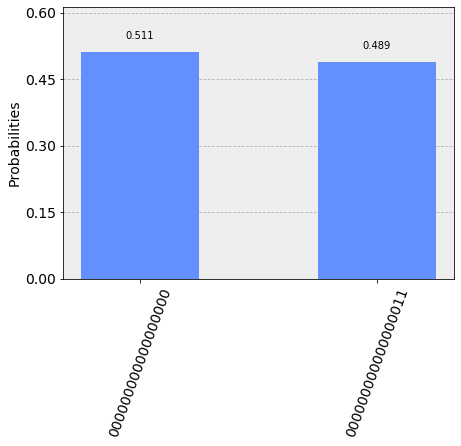

In [3]:
#Circuit 1: 
circuit.h(qr[0]) #applies the Hadamard gate to the first qubit
circuit.barrier(qr)
circuit.barrier(qr)
circuit.cx(qr[0], qr[1]) #applies Controlled-X to the second qubit
circuit.measure(qr[0], cr[0])
circuit.measure(qr[1], cr[1])
result = execute(circuit, backend = simulator).result()
plot_histogram(result.get_counts(circuit))

# For the next circuits, the error will be in between the two barriers.


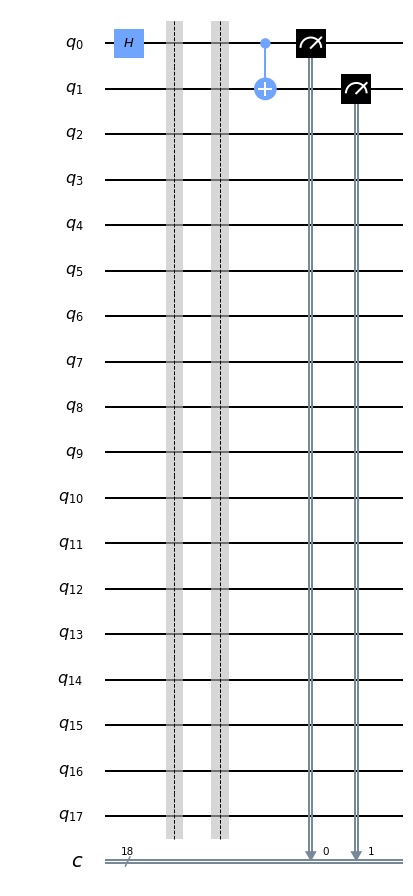

In [4]:
# Plot for circuit 1
circuit.draw(output='mpl') 


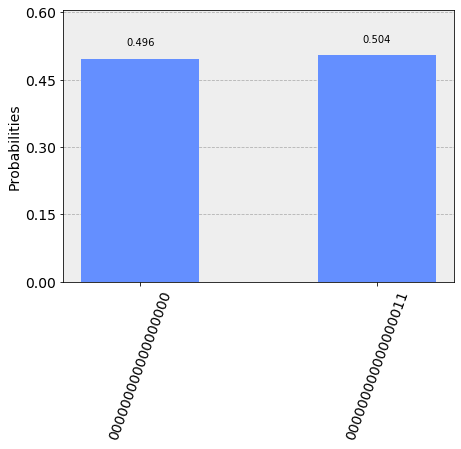

In [5]:
# The following is the circuit I have come up with to fix the errors. I should always have same result as above if my circuit1 is 
# correct
circuit1 = QuantumCircuit(qr, cr)
circuit1.h(qr[0])
circuit1.cx(qr[0], qr[6])
circuit1.cx(qr[1], qr[7])
circuit1.cx(qr[0], qr[12])
circuit1.h(qr[0])
circuit1.cx(qr[1], qr[13])
circuit1.h(qr[1])
circuit1.h(qr[6])
circuit1.h(qr[7])
circuit1.h(qr[12])
circuit1.h(qr[13])
circuit1.cx(qr[0], qr[2])
circuit1.cx(qr[6], qr[8])
circuit1.cx(qr[12], qr[14])
circuit1.cx(qr[1], qr[3])
circuit1.cx(qr[7], qr[9])
circuit1.cx(qr[13], qr[15])
circuit1.cx(qr[0], qr[4])
circuit1.cx(qr[6], qr[10])
circuit1.cx(qr[12], qr[16])
circuit1.cx(qr[1], qr[5])
circuit1.cx(qr[7], qr[11])
circuit1.cx(qr[13], qr[17])
circuit1.barrier(qr) # The arbibrary error gates will be below this operation (i.e in between the two barriers)
circuit1.barrier(qr)
circuit1.cx(qr[0], qr[2])
circuit1.cx(qr[6], qr[8])
circuit1.cx(qr[12], qr[14])
circuit1.cx(qr[1], qr[3])
circuit1.cx(qr[7], qr[9])
circuit1.cx(qr[13], qr[15])
circuit1.cx(qr[0], qr[4])
circuit1.cx(qr[6], qr[10])
circuit1.cx(qr[12], qr[16])
circuit1.cx(qr[1], qr[5])
circuit1.cx(qr[7], qr[11])
circuit1.cx(qr[13], qr[17])
circuit1.ccx(qr[4], qr[2], qr[0])
circuit1.ccx(qr[10], qr[8], qr[6])
circuit1.ccx(qr[16], qr[14], qr[12])
circuit1.ccx(qr[5], qr[3], qr[1])
circuit1.ccx(qr[11], qr[9], qr[7])
circuit1.ccx(qr[17], qr[15], qr[13])
circuit1.barrier(qr)
circuit1.h(qr[0])
circuit1.h(qr[1])
circuit1.h(qr[6])
circuit1.h(qr[7])
circuit1.h(qr[12])
circuit1.h(qr[13])
circuit1.cx(qr[0], qr[6])
circuit1.cx(qr[1], qr[7])
circuit1.cx(qr[0], qr[12])
circuit1.cx(qr[1], qr[13])
circuit1.ccx(qr[12], qr[6], qr[0])
circuit1.ccx(qr[13], qr[7], qr[1])
circuit1.cx(qr[0], qr[1])
circuit1.measure(qr[0], cr[0])
circuit1.measure(qr[1], cr[1])

# To Simulate
result = execute(circuit1, backend = simulator).result()
plot_histogram(result.get_counts(circuit1))

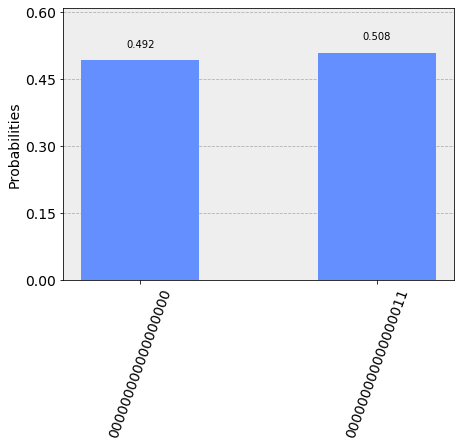

In [7]:
# For errors {I,X,Z}, the possible combinations are {I,I}, {I,X}, {X,I}, {I,Z}, {Z,I}, {X,Z}, {Z,X}, {Z,Z}, and {X,X}.
# Fortunately, the Circuit and result above can both serve as circuit and result for {I, I}

# FOR {I, X}
circuit2 = QuantumCircuit(qr, cr)
circuit2.h(qr[0])
circuit2.cx(qr[0], qr[6])
circuit2.cx(qr[1], qr[7])
circuit2.cx(qr[0], qr[12])
circuit2.h(qr[0])
circuit2.cx(qr[1], qr[13])
circuit2.h(qr[1])
circuit2.h(qr[6])
circuit2.h(qr[7])
circuit2.h(qr[12])
circuit2.h(qr[13])
circuit2.cx(qr[0], qr[2])
circuit2.cx(qr[6], qr[8])
circuit2.cx(qr[12], qr[14])
circuit2.cx(qr[1], qr[3])
circuit2.cx(qr[7], qr[9])
circuit2.cx(qr[13], qr[15])
circuit2.cx(qr[0], qr[4])
circuit2.cx(qr[6], qr[10])
circuit2.cx(qr[12], qr[16])
circuit2.cx(qr[1], qr[5])
circuit2.cx(qr[7], qr[11])
circuit2.cx(qr[13], qr[17])
circuit2.barrier(qr)
circuit2.x(qr[1]) # x to the second qubit q[1], I to the first qubit q[0]
circuit2.barrier(qr)
circuit2.cx(qr[0], qr[2])
circuit2.cx(qr[6], qr[8])
circuit2.cx(qr[12], qr[14])
circuit2.cx(qr[1], qr[3])
circuit2.cx(qr[7], qr[9])
circuit2.cx(qr[13], qr[15])
circuit2.cx(qr[0], qr[4])
circuit2.cx(qr[6], qr[10])
circuit2.cx(qr[12], qr[16])
circuit2.cx(qr[1], qr[5])
circuit2.cx(qr[7], qr[11])
circuit2.cx(qr[13], qr[17])
circuit2.ccx(qr[4], qr[2], qr[0])
circuit2.ccx(qr[10], qr[8], qr[6])
circuit2.ccx(qr[16], qr[14], qr[12])
circuit2.ccx(qr[5], qr[3], qr[1])
circuit2.ccx(qr[11], qr[9], qr[7])
circuit2.ccx(qr[17], qr[15], qr[13])
circuit2.barrier(qr)
circuit2.h(qr[0])
circuit2.h(qr[1])
circuit2.h(qr[6])
circuit2.h(qr[7])
circuit2.h(qr[12])
circuit2.h(qr[13])
circuit2.cx(qr[0], qr[6])
circuit2.cx(qr[1], qr[7])
circuit2.cx(qr[0], qr[12])
circuit2.cx(qr[1], qr[13])
circuit2.ccx(qr[12], qr[6], qr[0])
circuit2.ccx(qr[13], qr[7], qr[1])
circuit2.cx(qr[0], qr[1])
circuit2.measure(qr[0], cr[0])
circuit2.measure(qr[1], cr[1])
result = execute(circuit2, backend = simulator).result()
plot_histogram(result.get_counts(circuit2))

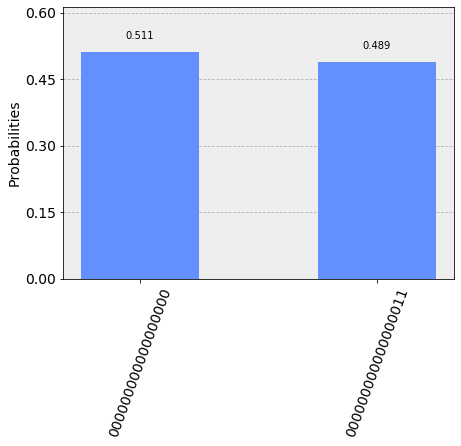

In [8]:
# FOR {X, I}
circuit3 = QuantumCircuit(qr, cr)
circuit3.h(qr[0])
circuit3.cx(qr[0], qr[6])
circuit3.cx(qr[1], qr[7])
circuit3.cx(qr[0], qr[12])
circuit3.h(qr[0])
circuit3.cx(qr[1], qr[13])
circuit3.h(qr[1])
circuit3.h(qr[6])
circuit3.h(qr[7])
circuit3.h(qr[12])
circuit3.h(qr[13])
circuit3.cx(qr[0], qr[2])
circuit3.cx(qr[6], qr[8])
circuit3.cx(qr[12], qr[14])
circuit3.cx(qr[1], qr[3])
circuit3.cx(qr[7], qr[9])
circuit3.cx(qr[13], qr[15])
circuit3.cx(qr[0], qr[4])
circuit3.cx(qr[6], qr[10])
circuit3.cx(qr[12], qr[16])
circuit3.cx(qr[1], qr[5])
circuit3.cx(qr[7], qr[11])
circuit3.cx(qr[13], qr[17])
circuit3.barrier(qr)
circuit3.x(qr[0]) # x to the first qubit q[0], I to the second qubit q[1]
circuit3.barrier(qr)
circuit3.cx(qr[0], qr[2])
circuit3.cx(qr[6], qr[8])
circuit3.cx(qr[12], qr[14])
circuit3.cx(qr[1], qr[3])
circuit3.cx(qr[7], qr[9])
circuit3.cx(qr[13], qr[15])
circuit3.cx(qr[0], qr[4])
circuit3.cx(qr[6], qr[10])
circuit3.cx(qr[12], qr[16])
circuit3.cx(qr[1], qr[5])
circuit3.cx(qr[7], qr[11])
circuit3.cx(qr[13], qr[17])
circuit3.ccx(qr[4], qr[2], qr[0])
circuit3.ccx(qr[10], qr[8], qr[6])
circuit3.ccx(qr[16], qr[14], qr[12])
circuit3.ccx(qr[5], qr[3], qr[1])
circuit3.ccx(qr[11], qr[9], qr[7])
circuit3.ccx(qr[17], qr[15], qr[13])
circuit3.barrier(qr)
circuit3.h(qr[0])
circuit3.h(qr[1])
circuit3.h(qr[6])
circuit3.h(qr[7])
circuit3.h(qr[12])
circuit3.h(qr[13])
circuit3.cx(qr[0], qr[6])
circuit3.cx(qr[1], qr[7])
circuit3.cx(qr[0], qr[12])
circuit3.cx(qr[1], qr[13])
circuit3.ccx(qr[12], qr[6], qr[0])
circuit3.ccx(qr[13], qr[7], qr[1])
circuit3.cx(qr[0], qr[1])
circuit3.measure(qr[0], cr[0])
circuit3.measure(qr[1], cr[1])
result = execute(circuit3, backend = simulator).result()
plot_histogram(result.get_counts(circuit3))

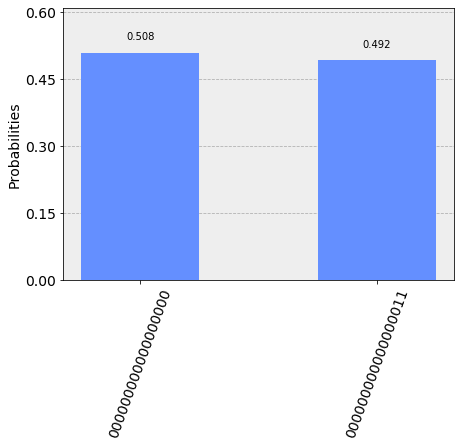

In [9]:
# FOR {I, Z}
circuit4 = QuantumCircuit(qr, cr)
circuit4.h(qr[0])
circuit4.cx(qr[0], qr[6])
circuit4.cx(qr[1], qr[7])
circuit4.cx(qr[0], qr[12])
circuit4.h(qr[0])
circuit4.cx(qr[1], qr[13])
circuit4.h(qr[1])
circuit4.h(qr[6])
circuit4.h(qr[7])
circuit4.h(qr[12])
circuit4.h(qr[13])
circuit4.cx(qr[0], qr[2])
circuit4.cx(qr[6], qr[8])
circuit4.cx(qr[12], qr[14])
circuit4.cx(qr[1], qr[3])
circuit4.cx(qr[7], qr[9])
circuit4.cx(qr[13], qr[15])
circuit4.cx(qr[0], qr[4])
circuit4.cx(qr[6], qr[10])
circuit4.cx(qr[12], qr[16])
circuit4.cx(qr[1], qr[5])
circuit4.cx(qr[7], qr[11])
circuit4.cx(qr[13], qr[17])
circuit4.barrier(qr)
circuit4.z(qr[1]) # z to the second qubit q[1], I to the first qubit q[0]
circuit4.barrier(qr)
circuit4.cx(qr[0], qr[2])
circuit4.cx(qr[6], qr[8])
circuit4.cx(qr[12], qr[14])
circuit4.cx(qr[1], qr[3])
circuit4.cx(qr[7], qr[9])
circuit4.cx(qr[13], qr[15])
circuit4.cx(qr[0], qr[4])
circuit4.cx(qr[6], qr[10])
circuit4.cx(qr[12], qr[16])
circuit4.cx(qr[1], qr[5])
circuit4.cx(qr[7], qr[11])
circuit4.cx(qr[13], qr[17])
circuit4.ccx(qr[4], qr[2], qr[0])
circuit4.ccx(qr[10], qr[8], qr[6])
circuit4.ccx(qr[16], qr[14], qr[12])
circuit4.ccx(qr[5], qr[3], qr[1])
circuit4.ccx(qr[11], qr[9], qr[7])
circuit4.ccx(qr[17], qr[15], qr[13])
circuit4.barrier(qr)
circuit4.h(qr[0])
circuit4.h(qr[1])
circuit4.h(qr[6])
circuit4.h(qr[7])
circuit4.h(qr[12])
circuit4.h(qr[13])
circuit4.cx(qr[0], qr[6])
circuit4.cx(qr[1], qr[7])
circuit4.cx(qr[0], qr[12])
circuit4.cx(qr[1], qr[13])
circuit4.ccx(qr[12], qr[6], qr[0])
circuit4.ccx(qr[13], qr[7], qr[1])
circuit4.cx(qr[0], qr[1])
circuit4.measure(qr[0], cr[0])
circuit4.measure(qr[1], cr[1])
result = execute(circuit4, backend = simulator).result()
plot_histogram(result.get_counts(circuit4))

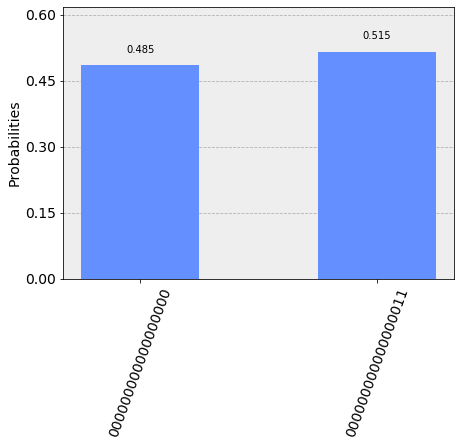

In [10]:
# FOR {Z, I}
circuit5 = QuantumCircuit(qr, cr)
circuit5.h(qr[0])
circuit5.cx(qr[0], qr[6])
circuit5.cx(qr[1], qr[7])
circuit5.cx(qr[0], qr[12])
circuit5.h(qr[0])
circuit5.cx(qr[1], qr[13])
circuit5.h(qr[1])
circuit5.h(qr[6])
circuit5.h(qr[7])
circuit5.h(qr[12])
circuit5.h(qr[13])
circuit5.cx(qr[0], qr[2])
circuit5.cx(qr[6], qr[8])
circuit5.cx(qr[12], qr[14])
circuit5.cx(qr[1], qr[3])
circuit5.cx(qr[7], qr[9])
circuit5.cx(qr[13], qr[15])
circuit5.cx(qr[0], qr[4])
circuit5.cx(qr[6], qr[10])
circuit5.cx(qr[12], qr[16])
circuit5.cx(qr[1], qr[5])
circuit5.cx(qr[7], qr[11])
circuit5.cx(qr[13], qr[17])
circuit5.barrier(qr)
circuit5.z(qr[0]) # z to the first qubit q[0], I to the second qubit q[1]
circuit5.barrier(qr)
circuit5.cx(qr[0], qr[2])
circuit5.cx(qr[6], qr[8])
circuit5.cx(qr[12], qr[14])
circuit5.cx(qr[1], qr[3])
circuit5.cx(qr[7], qr[9])
circuit5.cx(qr[13], qr[15])
circuit5.cx(qr[0], qr[4])
circuit5.cx(qr[6], qr[10])
circuit5.cx(qr[12], qr[16])
circuit5.cx(qr[1], qr[5])
circuit5.cx(qr[7], qr[11])
circuit5.cx(qr[13], qr[17])
circuit5.ccx(qr[4], qr[2], qr[0])
circuit5.ccx(qr[10], qr[8], qr[6])
circuit5.ccx(qr[16], qr[14], qr[12])
circuit5.ccx(qr[5], qr[3], qr[1])
circuit5.ccx(qr[11], qr[9], qr[7])
circuit5.ccx(qr[17], qr[15], qr[13])
circuit5.barrier(qr)
circuit5.h(qr[0])
circuit5.h(qr[1])
circuit5.h(qr[6])
circuit5.h(qr[7])
circuit5.h(qr[12])
circuit5.h(qr[13])
circuit5.cx(qr[0], qr[6])
circuit5.cx(qr[1], qr[7])
circuit5.cx(qr[0], qr[12])
circuit5.cx(qr[1], qr[13])
circuit5.ccx(qr[12], qr[6], qr[0])
circuit5.ccx(qr[13], qr[7], qr[1])
circuit5.cx(qr[0], qr[1])
circuit5.measure(qr[0], cr[0])
circuit5.measure(qr[1], cr[1])
result = execute(circuit5, backend = simulator).result()
plot_histogram(result.get_counts(circuit5))

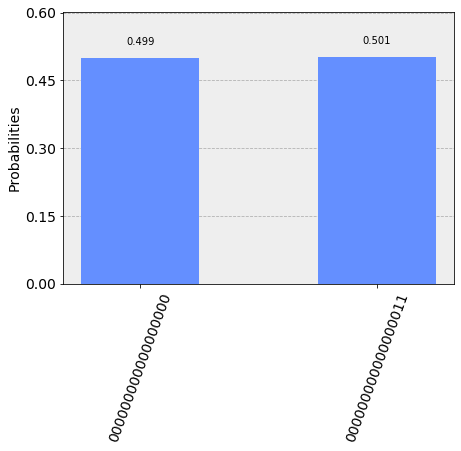

In [11]:
# FOR {X, Z}
circuit6 = QuantumCircuit(qr, cr)
circuit6.h(qr[0])
circuit6.cx(qr[0], qr[6])
circuit6.cx(qr[1], qr[7])
circuit6.cx(qr[0], qr[12])
circuit6.h(qr[0])
circuit6.cx(qr[1], qr[13])
circuit6.h(qr[1])
circuit6.h(qr[6])
circuit6.h(qr[7])
circuit6.h(qr[12])
circuit6.h(qr[13])
circuit6.cx(qr[0], qr[2])
circuit6.cx(qr[6], qr[8])
circuit6.cx(qr[12], qr[14])
circuit6.cx(qr[1], qr[3])
circuit6.cx(qr[7], qr[9])
circuit6.cx(qr[13], qr[15])
circuit6.cx(qr[0], qr[4])
circuit6.cx(qr[6], qr[10])
circuit6.cx(qr[12], qr[16])
circuit6.cx(qr[1], qr[5])
circuit6.cx(qr[7], qr[11])
circuit6.cx(qr[13], qr[17])
circuit6.barrier(qr)
circuit6.x(qr[0]) # x to the first qubit q[0]
circuit6.z(qr[1]) # z to the second qubit q[1]
circuit6.barrier(qr)
circuit6.cx(qr[0], qr[2])
circuit6.cx(qr[6], qr[8])
circuit6.cx(qr[12], qr[14])
circuit6.cx(qr[1], qr[3])
circuit6.cx(qr[7], qr[9])
circuit6.cx(qr[13], qr[15])
circuit6.cx(qr[0], qr[4])
circuit6.cx(qr[6], qr[10])
circuit6.cx(qr[12], qr[16])
circuit6.cx(qr[1], qr[5])
circuit6.cx(qr[7], qr[11])
circuit6.cx(qr[13], qr[17])
circuit6.ccx(qr[4], qr[2], qr[0])
circuit6.ccx(qr[10], qr[8], qr[6])
circuit6.ccx(qr[16], qr[14], qr[12])
circuit6.ccx(qr[5], qr[3], qr[1])
circuit6.ccx(qr[11], qr[9], qr[7])
circuit6.ccx(qr[17], qr[15], qr[13])
circuit6.barrier(qr)
circuit6.h(qr[0])
circuit6.h(qr[1])
circuit6.h(qr[6])
circuit6.h(qr[7])
circuit6.h(qr[12])
circuit6.h(qr[13])
circuit6.cx(qr[0], qr[6])
circuit6.cx(qr[1], qr[7])
circuit6.cx(qr[0], qr[12])
circuit6.cx(qr[1], qr[13])
circuit6.ccx(qr[12], qr[6], qr[0])
circuit6.ccx(qr[13], qr[7], qr[1])
circuit6.cx(qr[0], qr[1])
circuit6.measure(qr[0], cr[0])
circuit6.measure(qr[1], cr[1])
result = execute(circuit6, backend = simulator).result()
plot_histogram(result.get_counts(circuit6))

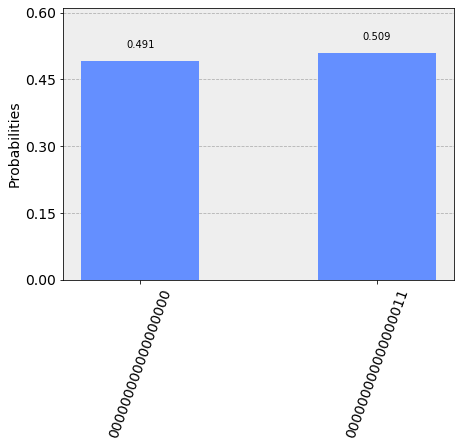

In [12]:
# FOR {Z, X}
circuit7 = QuantumCircuit(qr, cr)
circuit7.h(qr[0])
circuit7.cx(qr[0], qr[6])
circuit7.cx(qr[1], qr[7])
circuit7.cx(qr[0], qr[12])
circuit7.h(qr[0])
circuit7.cx(qr[1], qr[13])
circuit7.h(qr[1])
circuit7.h(qr[6])
circuit7.h(qr[7])
circuit7.h(qr[12])
circuit7.h(qr[13])
circuit7.cx(qr[0], qr[2])
circuit7.cx(qr[6], qr[8])
circuit7.cx(qr[12], qr[14])
circuit7.cx(qr[1], qr[3])
circuit7.cx(qr[7], qr[9])
circuit7.cx(qr[13], qr[15])
circuit7.cx(qr[0], qr[4])
circuit7.cx(qr[6], qr[10])
circuit7.cx(qr[12], qr[16])
circuit7.cx(qr[1], qr[5])
circuit7.cx(qr[7], qr[11])
circuit7.cx(qr[13], qr[17])
circuit7.barrier(qr)
circuit7.z(qr[0]) # z to the first qubit q[0]
circuit7.x(qr[1]) # x to the second qubit q[1]
circuit7.barrier(qr)
circuit7.cx(qr[0], qr[2])
circuit7.cx(qr[6], qr[8])
circuit7.cx(qr[12], qr[14])
circuit7.cx(qr[1], qr[3])
circuit7.cx(qr[7], qr[9])
circuit7.cx(qr[13], qr[15])
circuit7.cx(qr[0], qr[4])
circuit7.cx(qr[6], qr[10])
circuit7.cx(qr[12], qr[16])
circuit7.cx(qr[1], qr[5])
circuit7.cx(qr[7], qr[11])
circuit7.cx(qr[13], qr[17])
circuit7.ccx(qr[4], qr[2], qr[0])
circuit7.ccx(qr[10], qr[8], qr[6])
circuit7.ccx(qr[16], qr[14], qr[12])
circuit7.ccx(qr[5], qr[3], qr[1])
circuit7.ccx(qr[11], qr[9], qr[7])
circuit7.ccx(qr[17], qr[15], qr[13])
circuit7.barrier(qr)
circuit7.h(qr[0])
circuit7.h(qr[1])
circuit7.h(qr[6])
circuit7.h(qr[7])
circuit7.h(qr[12])
circuit7.h(qr[13])
circuit7.cx(qr[0], qr[6])
circuit7.cx(qr[1], qr[7])
circuit7.cx(qr[0], qr[12])
circuit7.cx(qr[1], qr[13])
circuit7.ccx(qr[12], qr[6], qr[0])
circuit7.ccx(qr[13], qr[7], qr[1])
circuit7.cx(qr[0], qr[1])
circuit7.measure(qr[0], cr[0])
circuit7.measure(qr[1], cr[1])
result = execute(circuit7, backend = simulator).result()
plot_histogram(result.get_counts(circuit7))

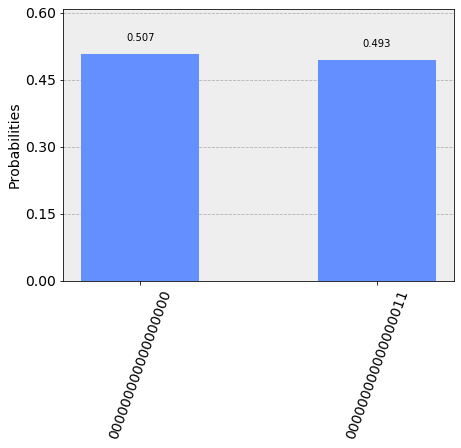

In [13]:
# FOR {Z, Z}
circuit8 = QuantumCircuit(qr, cr)
circuit8.h(qr[0])
circuit8.cx(qr[0], qr[6])
circuit8.cx(qr[1], qr[7])
circuit8.cx(qr[0], qr[12])
circuit8.h(qr[0])
circuit8.cx(qr[1], qr[13])
circuit8.h(qr[1])
circuit8.h(qr[6])
circuit8.h(qr[7])
circuit8.h(qr[12])
circuit8.h(qr[13])
circuit8.cx(qr[0], qr[2])
circuit8.cx(qr[6], qr[8])
circuit8.cx(qr[12], qr[14])
circuit8.cx(qr[1], qr[3])
circuit8.cx(qr[7], qr[9])
circuit8.cx(qr[13], qr[15])
circuit8.cx(qr[0], qr[4])
circuit8.cx(qr[6], qr[10])
circuit8.cx(qr[12], qr[16])
circuit8.cx(qr[1], qr[5])
circuit8.cx(qr[7], qr[11])
circuit8.cx(qr[13], qr[17])
circuit8.barrier(qr)
circuit8.z(qr[0]) # z to the first qubit q[0]
circuit8.z(qr[1]) # z to the second qubit q[1]
circuit8.barrier(qr)
circuit8.cx(qr[0], qr[2])
circuit8.cx(qr[6], qr[8])
circuit8.cx(qr[12], qr[14])
circuit8.cx(qr[1], qr[3])
circuit8.cx(qr[7], qr[9])
circuit8.cx(qr[13], qr[15])
circuit8.cx(qr[0], qr[4])
circuit8.cx(qr[6], qr[10])
circuit8.cx(qr[12], qr[16])
circuit8.cx(qr[1], qr[5])
circuit8.cx(qr[7], qr[11])
circuit8.cx(qr[13], qr[17])
circuit8.ccx(qr[4], qr[2], qr[0])
circuit8.ccx(qr[10], qr[8], qr[6])
circuit8.ccx(qr[16], qr[14], qr[12])
circuit8.ccx(qr[5], qr[3], qr[1])
circuit8.ccx(qr[11], qr[9], qr[7])
circuit8.ccx(qr[17], qr[15], qr[13])
circuit8.barrier(qr)
circuit8.h(qr[0])
circuit8.h(qr[1])
circuit8.h(qr[6])
circuit8.h(qr[7])
circuit8.h(qr[12])
circuit8.h(qr[13])
circuit8.cx(qr[0], qr[6])
circuit8.cx(qr[1], qr[7])
circuit8.cx(qr[0], qr[12])
circuit8.cx(qr[1], qr[13])
circuit8.ccx(qr[12], qr[6], qr[0])
circuit8.ccx(qr[13], qr[7], qr[1])
circuit8.cx(qr[0], qr[1])
circuit8.measure(qr[0], cr[0])
circuit8.measure(qr[1], cr[1])
result = execute(circuit8, backend = simulator).result()
plot_histogram(result.get_counts(circuit8))

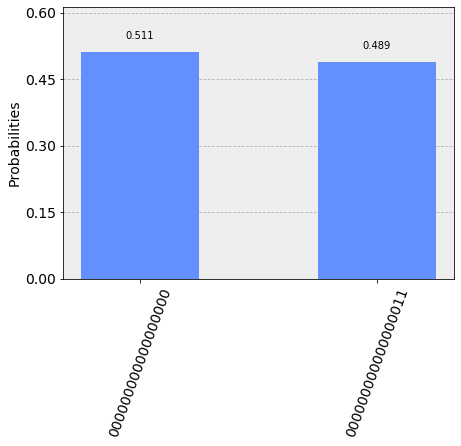

In [14]:
# Finally. FOR {X, X}
circuit9 = QuantumCircuit(qr, cr)
circuit9.h(qr[0])
circuit9.cx(qr[0], qr[6])
circuit9.cx(qr[1], qr[7])
circuit9.cx(qr[0], qr[12])
circuit9.h(qr[0])
circuit9.cx(qr[1], qr[13])
circuit9.h(qr[1])
circuit9.h(qr[6])
circuit9.h(qr[7])
circuit9.h(qr[12])
circuit9.h(qr[13])
circuit9.cx(qr[0], qr[2])
circuit9.cx(qr[6], qr[8])
circuit9.cx(qr[12], qr[14])
circuit9.cx(qr[1], qr[3])
circuit9.cx(qr[7], qr[9])
circuit9.cx(qr[13], qr[15])
circuit9.cx(qr[0], qr[4])
circuit9.cx(qr[6], qr[10])
circuit9.cx(qr[12], qr[16])
circuit9.cx(qr[1], qr[5])
circuit9.cx(qr[7], qr[11])
circuit9.cx(qr[13], qr[17])
circuit9.barrier(qr)
circuit9.x(qr[0]) # x to the first qubit q[0]
circuit9.x(qr[1]) # x to the second qubit q[1]
circuit9.barrier(qr)
circuit9.cx(qr[0], qr[2])
circuit9.cx(qr[6], qr[8])
circuit9.cx(qr[12], qr[14])
circuit9.cx(qr[1], qr[3])
circuit9.cx(qr[7], qr[9])
circuit9.cx(qr[13], qr[15])
circuit9.cx(qr[0], qr[4])
circuit9.cx(qr[6], qr[10])
circuit9.cx(qr[12], qr[16])
circuit9.cx(qr[1], qr[5])
circuit9.cx(qr[7], qr[11])
circuit9.cx(qr[13], qr[17])
circuit9.ccx(qr[4], qr[2], qr[0])
circuit9.ccx(qr[10], qr[8], qr[6])
circuit9.ccx(qr[16], qr[14], qr[12])
circuit9.ccx(qr[5], qr[3], qr[1])
circuit9.ccx(qr[11], qr[9], qr[7])
circuit9.ccx(qr[17], qr[15], qr[13])
circuit9.barrier(qr)
circuit9.h(qr[0])
circuit9.h(qr[1])
circuit9.h(qr[6])
circuit9.h(qr[7])
circuit9.h(qr[12])
circuit9.h(qr[13])
circuit9.cx(qr[0], qr[6])
circuit9.cx(qr[1], qr[7])
circuit9.cx(qr[0], qr[12])
circuit9.cx(qr[1], qr[13])
circuit9.ccx(qr[12], qr[6], qr[0])
circuit9.ccx(qr[13], qr[7], qr[1])
circuit9.cx(qr[0], qr[1])
circuit9.measure(qr[0], cr[0])
circuit9.measure(qr[1], cr[1])
result = execute(circuit9, backend = simulator).result()
plot_histogram(result.get_counts(circuit9))

In [ ]:
# From the above results, it is clear that my circuit fixes the error. 

# I am grateful for this opportunity. I just realized how "not_so_good" my programming skill is. I figured out how to solve Task 
# 3 but writing the program is kind of new and hard for me. To avoid running out of time, I decided to go with Task 2. 
# Although I will keep working on Task 3 till I get it done.

# Is it possible to get a feedback on the above codes? Esp. on how to make the codes neat, how to not rewrite code for 
# each new circuitN for 1 \leq N \leq 9, and  how to randomly select any two error gates from the set {I, X, Z}. THANK YOU